In [8]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

options = webdriver.ChromeOptions()

prefs = {'download.default_directory':'/home/addinedu/dev_ws/data',
         'download.prompt_for_down load': False}
options. add_experimental_option('prefs', prefs)

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service("/home/addinedu/dev_ws/driver/chromedriver-linux64/chromedriver"), options=options)

 

   

driver. get(url)

In [9]:

driver. get(url)

In [12]:
from selenium.webdriver.common.by import By

sido = driver.find_element(By.ID, "SIDO_NM0")
sido_list = sido.find_elements(By.TAG_NAME, "option")
for idx, sido_name in enumerate(sido_list):
    print(str(idx) + ". " + sido_name.get_attribute("value"))

0. 
1. 서울특별시
2. 부산광역시
3. 대구광역시
4. 인천광역시
5. 광주광역시
6. 대전광역시
7. 울산광역시
8. 세종특별자치시
9. 경기도
10. 강원특별자치도
11. 충청북도
12. 충청남도
13. 전북특별자치도
14. 전라남도
15. 경상북도
16. 경상남도
17. 제주특별자치도


In [13]:
sido_names = [sido_name.get_attribute("value") for sido_name in sido_list]
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [14]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [16]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu.find_elements(By.TAG_NAME, "option")

gu_names = [gu_name.get_attribute("value") for gu_name in gu_list]
print(len(gu_names), gu_names)

26 ['', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [17]:
gu_names.remove('')
print(len(gu_names), gu_names)

25 ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [18]:
gu.send_keys(gu_names[15])

In [19]:
import time
from tqdm.notebook import tqdm

# for gu_name in tqdm(gu_names[:3]):
#     gu = driver.find_element(By.ID, "SIGUNGU_NM0")
#     gu.send_keys(gu_name)
#     time.sleep(3)

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# driver.find_element(By.XPATH, '''//*[@id="glopopd_excel"]''').click

In [ ]:
# for gu_name in tqdm(gu_names):
#     gu = driver.find_element(By.ID, "SIGUNGU_NM0")
#     gu.send_keys(gu_names)
#     driver.implicitly_wait(3)

#     driver.find_element(By.XPATH, '''//*[@id="glopopd_excel"]''').click()

In [ ]:
from glob import glob

# len(glob("/home/addinedu/dev_ws/data/지역_*"))

In [ ]:
# import os 
# for file in glob("/home/addinedu/dev_ws/data/지역_*"):
#     os.remove(file)

# len(glob("/home/addinedu/dev_ws/data/지역_*"))

In [27]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from glob import glob

for gu_name in tqdm(gu_names):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)   #gu_name에 할당된 "구"로 이동하기 위한 수단.(텍스트 필드나 다른 입력 요소에 값을 입력하는 메서드)

    save = WebDriverWait(driver, timeout=30).until(EC.element_to_be_clickable((By.XPATH, """//*[@id="glopopd_excel"]""")))
    ActionChains(driver).move_to_element(save).perform()
    save.send_keys(Keys.ENTER)

    time.sleep(1)

len(glob("/home/addinedu/dev_ws/data/지역_*"))

  0%|          | 0/25 [00:00<?, ?it/s]

25

In [28]:
len(glob("/home/addinedu/dev_ws/data/지역_*"))


25

In [29]:
from glob import glob

file_list = glob("/home/addinedu/dev_ws/data/지역_*")
print(len(file_list))
file_list

25


['/home/addinedu/dev_ws/data/지역_위치별(주유소) (7).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (19).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (20).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (4).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (22).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (8).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (24).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (14).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (3).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (13).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (5).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (1).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (15).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (18).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (10).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (23).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (17).xls',
 '/home/addinedu/dev_ws/data/지역_위치별(주유소) (16).xls',
 '/home/addinedu/dev_ws

In [30]:
driver.close()

In [31]:
import pandas as pd

data = pd.read_excel(file_list[0], header=2)
data.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
9,서울특별시,백산주유소,서울특별시 금천구 시흥대로 174 (시흥동),S-OIL,02-807-3161,Y,-,1685,1595,-
10,서울특별시,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,GS칼텍스,02-896-5145,Y,1895,1695,1595,1650


In [32]:
data_list = []

for file in file_list:
    data = pd.read_excel(file,header=2)
    data_list.append(data)

oil_data = pd.concat(data_list)
len(oil_data)

440

In [33]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 8
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      440 non-null    object
 1   상호      440 non-null    object
 2   주소      440 non-null    object
 3   상표      440 non-null    object
 4   전화번호    440 non-null    object
 5   셀프여부    440 non-null    object
 6   고급휘발유   440 non-null    object
 7   휘발유     440 non-null    object
 8   경유      440 non-null    object
 9   실내등유    440 non-null    object
dtypes: object(10)
memory usage: 37.8+ KB


In [34]:
oil_data = pd.DataFrame({"상호": oil_data["상호"],
                         "주소": oil_data["주소"],
                         "가격": oil_data["휘발유"],
                         "셀프": oil_data["셀프여부"],
                         "상표": oil_data["상표"],
                         })
oil_data.tail()

,상호,주소,가격,셀프,상표
4,매일주유소,서울 동작구 상도로 139 (상도동),1679,Y,S-OIL
5,HD현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1684,Y,HD현대오일뱅크
6,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),1684,Y,GS칼텍스
7,HD현대오일뱅크㈜직영 동작주유소,서울 동작구 상도로 403 (상도동),1694,N,HD현대오일뱅크
8,살피재주유소,서울 동작구 상도로 334,1785,N,SK에너지


In [35]:
oil_data.reset_index(drop=True, inplace=True)
oil_data.tail()

,상호,주소,가격,셀프,상표
435,매일주유소,서울 동작구 상도로 139 (상도동),1679,Y,S-OIL
436,HD현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1684,Y,HD현대오일뱅크
437,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),1684,Y,GS칼텍스
438,HD현대오일뱅크㈜직영 동작주유소,서울 동작구 상도로 403 (상도동),1694,N,HD현대오일뱅크
439,살피재주유소,서울 동작구 상도로 334,1785,N,SK에너지


In [36]:
oil_data["구"] = [address.split()[1] for address in oil_data["주소"]]
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,(주)화동유업 화동주유소,서울 금천구 시흥대로 484,1622,Y,SK에너지,금천구
1,(주)백운주유소,서울 금천구 시흥대로 282 (독산동),1623,Y,알뜰주유소,금천구
2,HD현대오일뱅크㈜직영 금천현대셀프주유소,서울 금천구 독산로 147 (시흥동),1624,Y,HD현대오일뱅크,금천구
3,구광주유소,서울 금천구 서부샛길 674 (가산동),1625,N,S-OIL,금천구
4,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),1665,Y,GS칼텍스,금천구


In [37]:
oil_data["구"].unique(), len(oil_data["구"].unique())

(array(['금천구', '영등포구', '용산구', '관악구', '종로구', '노원구', '중랑구', '서초구', '강서구',
        '서대문구', '광진구', '강동구', '성동구', '양천구', '동대문구', '강남구', '중구', '송파구',
        '성북구', '은평구', '구로구', '마포구', '도봉구', '강북구', '동작구'], dtype=object),
 25)

In [38]:
oil_data[oil_data["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
38,도림주유소,서울 영등포구 도림로 343 (도림동),-,Y,알뜰주유소,영등포구
222,삼우주유소,서울 성동구 천호대로 392,-,N,SK에너지,성동구
390,JHC에너지,서울 구로구 시흥대로 539,-,N,HD현대오일뱅크,구로구


In [39]:
oil_data = oil_data[oil_data["가격"] != "-"]
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,(주)화동유업 화동주유소,서울 금천구 시흥대로 484,1622,Y,SK에너지,금천구
1,(주)백운주유소,서울 금천구 시흥대로 282 (독산동),1623,Y,알뜰주유소,금천구
2,HD현대오일뱅크㈜직영 금천현대셀프주유소,서울 금천구 독산로 147 (시흥동),1624,Y,HD현대오일뱅크,금천구
3,구광주유소,서울 금천구 서부샛길 674 (가산동),1625,N,S-OIL,금천구
4,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),1665,Y,GS칼텍스,금천구


In [40]:
oil_data["가격"] = oil_data["가격"].astype("float")

In [41]:
oil_data


,상호,주소,가격,셀프,상표,구
0,(주)화동유업 화동주유소,서울 금천구 시흥대로 484,1622.0,Y,SK에너지,금천구
1,(주)백운주유소,서울 금천구 시흥대로 282 (독산동),1623.0,Y,알뜰주유소,금천구
2,HD현대오일뱅크㈜직영 금천현대셀프주유소,서울 금천구 독산로 147 (시흥동),1624.0,Y,HD현대오일뱅크,금천구
3,구광주유소,서울 금천구 서부샛길 674 (가산동),1625.0,N,S-OIL,금천구
4,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),1665.0,Y,GS칼텍스,금천구
...,...,...,...,...,...,...
435,매일주유소,서울 동작구 상도로 139 (상도동),1679.0,Y,S-OIL,동작구
436,HD현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1684.0,Y,HD현대오일뱅크,동작구
437,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),1684.0,Y,GS칼텍스,동작구
438,HD현대오일뱅크㈜직영 동작주유소,서울 동작구 상도로 403 (상도동),1694.0,N,HD현대오일뱅크,동작구


In [44]:
print(oil_data["가격"])

0      1622.0
1      1623.0
2      1624.0
3      1625.0
4      1665.0
        ...  
435    1679.0
436    1684.0
437    1684.0
438    1694.0
439    1785.0
Name: 가격, Length: 437, dtype: float64


In [45]:
oil_data.reset_index(drop=True, inplace=True)
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,(주)화동유업 화동주유소,서울 금천구 시흥대로 484,1622.0,Y,SK에너지,금천구
1,(주)백운주유소,서울 금천구 시흥대로 282 (독산동),1623.0,Y,알뜰주유소,금천구
2,HD현대오일뱅크㈜직영 금천현대셀프주유소,서울 금천구 독산로 147 (시흥동),1624.0,Y,HD현대오일뱅크,금천구
3,구광주유소,서울 금천구 서부샛길 674 (가산동),1625.0,N,S-OIL,금천구
4,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),1665.0,Y,GS칼텍스,금천구


### <b> 시각화

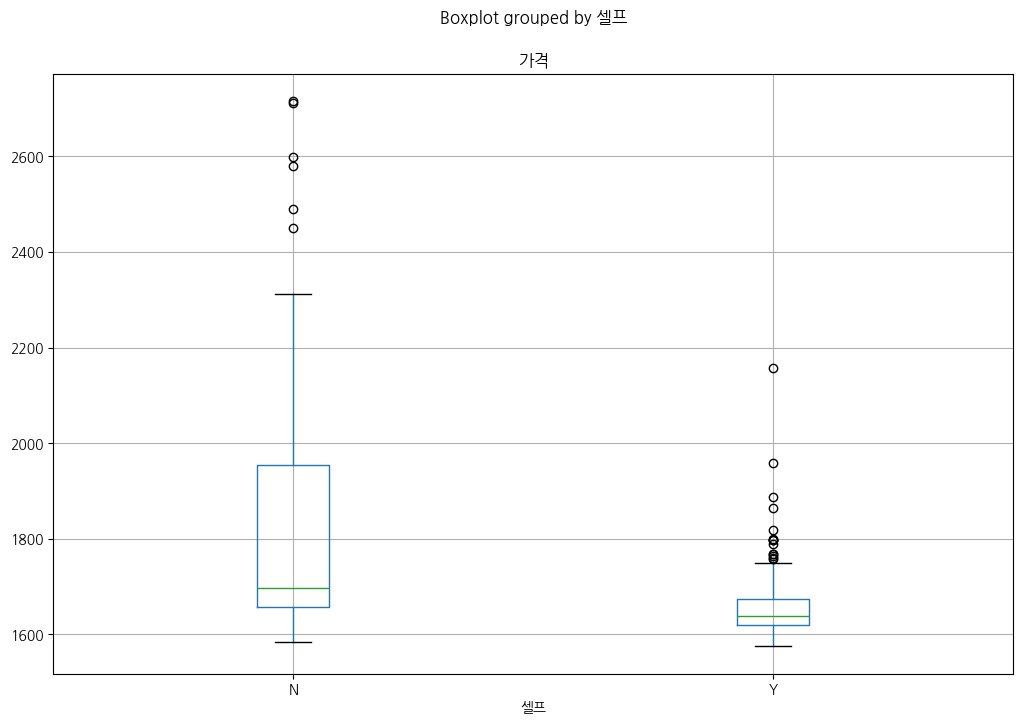

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
oil_data.boxplot(column="가격", by="셀프", figsize=(12,8));

/tmp/ipykernel_5231/3422464670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="셀프", y="가격", data=oil_data, palette="Set1")


<function matplotlib.pyplot.show(close=None, block=None)>

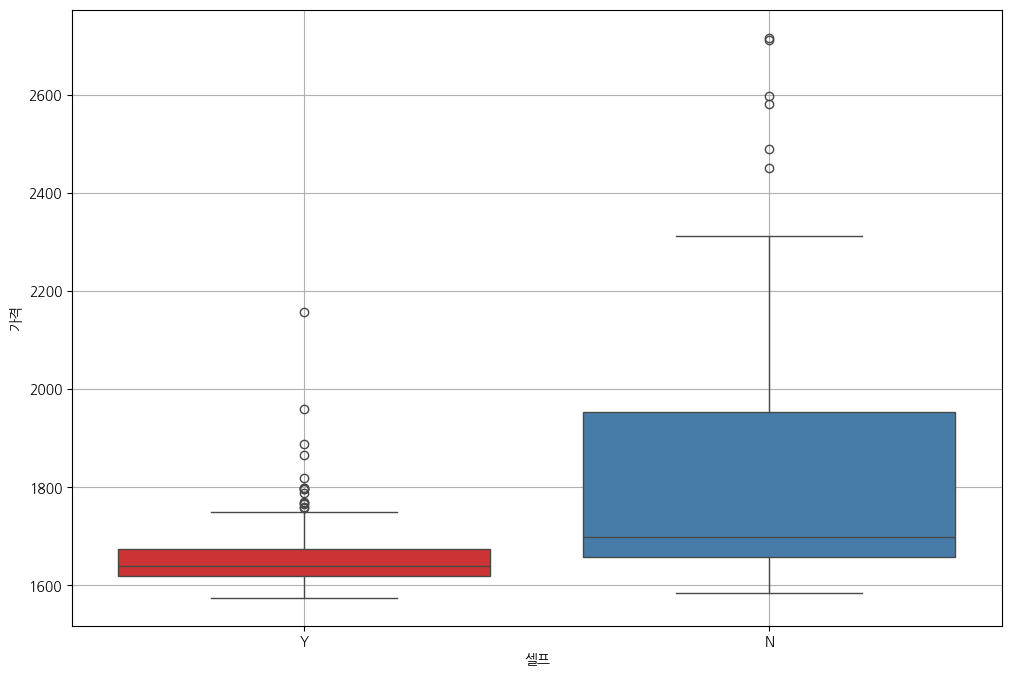

In [47]:
plt.figure(figsize=(12,8))
sns.boxplot(x="셀프", y="가격", data=oil_data, palette="Set1")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

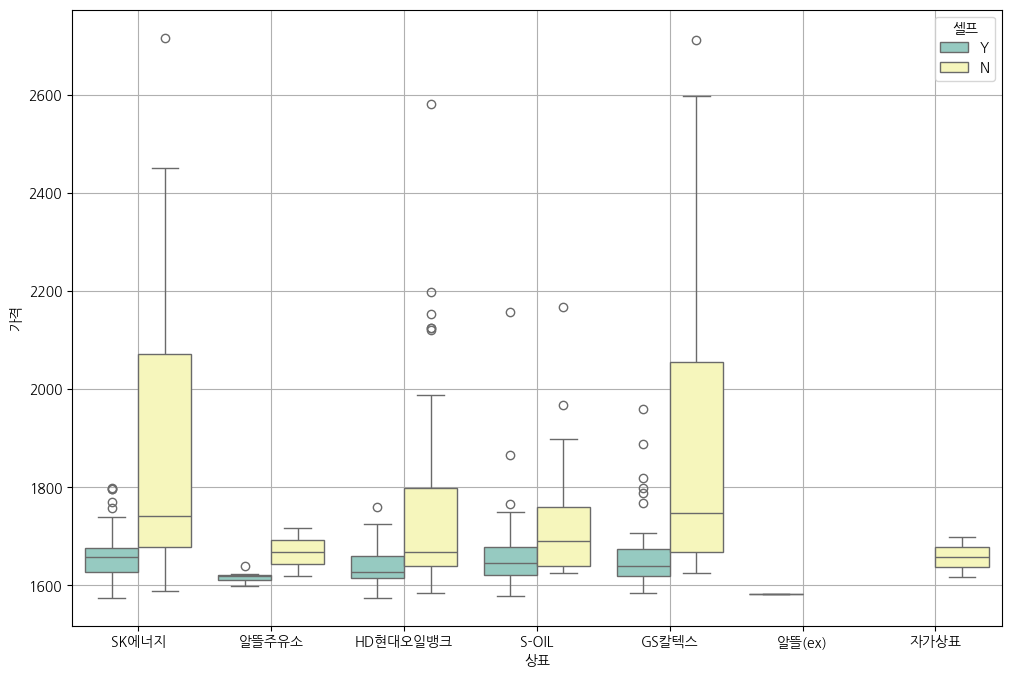

In [48]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=oil_data, palette="Set3")
plt.grid(True)
plt.show

In [49]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [50]:
oil_data.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
304,서남주유소,서울 중구 통일로 30,2716.0,N,SK에너지,중구
49,서계주유소,서울 용산구 청파로 367 (청파동),2712.0,N,GS칼텍스,용산구
294,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
293,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2580.0,N,HD현대오일뱅크,강남구
303,필동주유소,서울 중구 퇴계로 196 (필동2가),2489.0,N,GS칼텍스,중구
292,SK논현주유소,서울 강남구 논현로 747 (논현동),2450.0,N,SK에너지,강남구
48,한석주유소,서울 용산구 이촌로 164,2312.0,N,SK에너지,용산구
72,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2295.0,N,GS칼텍스,종로구
37,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2295.0,N,GS칼텍스,영등포구
71,경복궁주유소,서울 종로구 율곡로 6 (중학동),2290.0,N,GS칼텍스,종로구


In [51]:
oil_data.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
12,영등포제일셀프주유소,서울 영등포구 가마산로 379,1575.0,Y,HD현대오일뱅크,영등포구
11,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1575.0,Y,SK에너지,영등포구
388,(주)타이거통상 월드컵주유소,서울 마포구 월드컵북로 170 (성산제2동),1579.0,Y,S-OIL,마포구
100,만남의광장주유소,서울 서초구 양재대로12길 73-71,1582.0,Y,알뜰(ex),서초구
371,서서울고속주유소,서울 구로구 경인로 150 (오류동),1582.0,Y,SK에너지,구로구
356,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1584.0,N,HD현대오일뱅크,은평구
14,성락주유소,서울 영등포구 가마산로 414 (신길동),1585.0,Y,S-OIL,영등포구
13,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1585.0,Y,GS칼텍스,영등포구
389,마포시엠주유소,서울 마포구 월드컵북로 62,1589.0,N,SK에너지,마포구
401,오복주유소,서울 도봉구 방학로 43,1590.0,Y,S-OIL,도봉구


In [53]:
import numpy as np

gu_data = pd.pivot_table(data=oil_data, index="구", values="가격", aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1914.687500
강동구,1736.500000
강북구,1618.416667
강서구,1673.666667
관악구,1693.714286


In [63]:
import json
import folium

geo_path = "/home/addinedu/dev_ws/data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="OpenStreetMap")

choropleth = folium.Choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, "가격"],
    key_on="feature.id",
    fill_color="PuRd",
).add_to(map)

map